In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

from matplotlib import rc

font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

In [7]:
filename ='eps_greedy.npy'
simple = np.load('results/dqn_environments/deep_chain/' + filename)


In [2]:
ucbs = []
gammas = [0, 0.25, 0.5, 0.9]
for gamma in gammas:
    filename ='eps_greedy_ucb_{}.npy'.format(gamma)
    ucb = np.load('results/dqn_environments/deep_chain/' + filename)
    ucbs.append(ucb)

In [43]:
def plot_results(simple, ucbs, title, dim_range):
    linewidth=4
    fontsize=20
    
    plt.figure(figsize=(10, 7))
    
    ax = plt.subplot(1, 1, 1)
 
    arr = simple
    min_ = arr.min(axis=0)
    max_ = arr.max(axis=0)
    mean = arr.mean(axis=0)

    plt.plot(dim_range, mean, label='baseline', linewidth=linewidth)
    ax.fill_between(dim_range, min_, max_, alpha=0.25)

    for ucb, gamma in zip(ucbs, gammas):
        arr = ucb
        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)
        plt.plot(dim_range, mean, label='gamma_E={}'.format(gamma), linewidth=linewidth)
        ax.fill_between(dim_range, min_, max_, alpha=0.25)

    
    plt.legend(loc='lower left', fontsize=15)
    plt.grid()
    plt.ylabel('Количество эпизодов', fontsize=fontsize)
    plt.xlabel('Длина цепочки', fontsize=fontsize)
    plt.title('UCB выбор действия', fontsize=fontsize)
    plt.ylim(0,1000)

In [44]:
dim_range = np.arange(5, 31, 5)

In [45]:
ucbs[0].shape

(3, 6)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


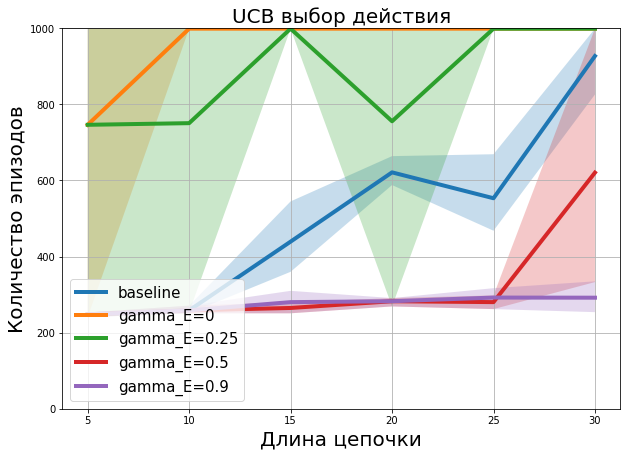

In [46]:
plot_results(simple, ucbs, '', dim_range)